In [79]:
#all needed libraries
import pandas as pd
import numpy as np
from Ridge_regression import RidgeRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error          
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [21]:
#Q1
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns for analysis
selected_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                    'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years',
                    'Income composition of resources', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Split data into features (X) and target variable (y)
X = data_cleaned.drop(columns=['Life expectancy'])
y = data_cleaned['Life expectancy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get coefficients of the features
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print sorted coefficients of the features 
print("Coefficients of predicting variables affecting life expectancy:")
print(coefficients)
print()

Mean Squared Error: 13.538037330650866
Coefficients of predicting variables affecting life expectancy:
                                  Coefficient
Income composition of resources  8.898811e+00
Schooling                        9.674145e-01
infant deaths                    9.706283e-02
Total expenditure                9.519913e-02
BMI                              2.656387e-02
Diphtheria                       1.403312e-02
Polio                            9.373085e-03
percentage expenditure           4.323361e-04
Population                       6.104266e-10
GDP                             -1.435150e-07
Measles                         -7.805768e-06
Hepatitis B                     -7.631890e-03
Adult Mortality                 -1.674187e-02
thinness  1-19 years            -4.228767e-02
thinness 5-9 years              -4.844076e-02
under-five deaths               -7.325762e-02
Alcohol                         -7.921129e-02
HIV/AIDS                        -4.326534e-01


In [87]:
#Evaluation for the model
import Nested_k_folds_SVM as eval

eval.nested_cross_validation([1, 3, 5, 7, 9, 11, 13, 15],X,y,k_fold=10)


Fold 0: Optimal C: 1000, Accuracy: 0.9386
Fold 1: Optimal C: 100, Accuracy: 0.9386
Fold 2: Optimal C: 100, Accuracy: 0.9737
Fold 3: Optimal C: 1000, Accuracy: 0.9825
Fold 4: Optimal C: 100, Accuracy: 0.9646
Average Accuracy:  0.9595870206489675


KeyError: "None of [Int64Index([ 165,  166,  167,  168,  169,  170,  171,  172,  173,  174,\n            ...\n            1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648],\n           dtype='int64', length=1484)] are in the [columns]"

In [83]:
#Q2

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Filter countries with life expectancy < 65
low_life_expectancy = data[data['Life expectancy'] < 65]
low_life_expectancy = low_life_expectancy[selected_columns].dropna()
# Split data into features (X) and target variable (y)
X = low_life_expectancy.drop(columns=['Life expectancy'])
y = low_life_expectancy['Life expectancy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)


# Split data into two groups based on healthcare expenditure
high_expenditure = low_life_expectancy[low_life_expectancy['Total expenditure'] >= low_life_expectancy['Total expenditure'].median()]
low_expenditure = low_life_expectancy[low_life_expectancy['Total expenditure'] < low_life_expectancy['Total expenditure'].median()]

# Perform t-test to compare life expectancy between high and low expenditure groups
t_stat, p_value = ttest_ind(high_expenditure['Life expectancy'], low_expenditure['Life expectancy'], equal_var=False)

# Determine significance level
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject null hypothesis: There is a significant difference in life expectancy between high and low expenditure groups."
else:
    conclusion = "Fail to reject null hypothesis: There is no significant difference in life expectancy between high and low expenditure groups."

print("T-statistic:", t_stat)
print("P-value:", p_value)
print(conclusion)

plt.scatter(low_life_expectancy['Total expenditure'],low_life_expectancy['Life expectancy'])
plt.xlabel('Total expedenture')
plt.ylabel('Life expectancy')
plt.title('Linear Regression Model')
plt.plot()

plt.scatter(low_life_expectancy['Total expenditure'],low_life_expectancy['Life expectancy'])
plt.xlabel('Total expedenture')
plt.ylabel('Life expectancy')
plt.plot(X_test, y_pred, color='red', label='Linear regression model')
plt.title('Linear Regression Model')
plt.show()
print("spending should be less in order to get a higher life expectancy")

KeyError: 'Total expenditure'

/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


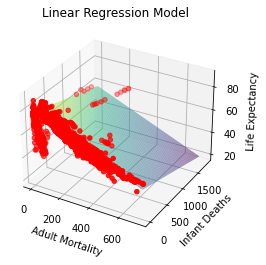

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1493.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:17:06   Log-Likelihood:                -9723.4
No. Observations:                2928   AIC:                         1.945e+04
Df Residuals:                    2925   BIC:                         1.947e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              78.2260      0.207    3

In [73]:
#Q3

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Define independent variables (infant deaths and adult mortality) and dependent variable (life expectancy)
X = data_cleaned[['Adult Mortality', 'infant deaths']]
y = data_cleaned['Life expectancy']

# Add constant to independent variables for regression intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Extract coefficients
intercept, coef_adult_mortality, coef_infant_deaths = model.params

# Generate data for plotting
x_adult_mortality = np.linspace(X['Adult Mortality'].min(), X['Adult Mortality'].max(), 100)
x_infant_deaths = np.linspace(X['infant deaths'].min(), X['infant deaths'].max(), 100)
X1, X2 = np.meshgrid(x_adult_mortality, x_infant_deaths)
Z = intercept + coef_adult_mortality * X1 + coef_infant_deaths * X2

# Plot the model and data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X['Adult Mortality'], X['infant deaths'], y, c='r', marker='o', label='Data Points')

# Plot the linear regression model
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis', label='Linear Regression Model')

# Set labels and title
ax.set_xlabel('Adult Mortality')
ax.set_ylabel('Infant Deaths')
ax.set_zlabel('Life Expectancy')
ax.set_title('Linear Regression Model')
plt.show()


# Select relevant columns
selected_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Define independent variables (infant deaths and adult mortality) and dependent variable (life expectancy)
X = data_cleaned[['Adult Mortality', 'infant deaths']]
y = data_cleaned['Life expectancy']

# Add constant to independent variables for regression intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

In [77]:
#Q4

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'BMI', 'Alcohol', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Extract correlation coefficients with life expectancy
life_expectancy_correlation = correlation_matrix['Life expectancy']

# Print correlation coefficients
print("Correlation with Life Expectancy:")
print(life_expectancy_correlation)


Correlation with Life Expectancy:
Life expectancy                    1.000000
BMI                                0.566617
Alcohol                            0.379419
HIV/AIDS                          -0.571140
thinness  1-19 years              -0.464997
thinness 5-9 years                -0.459593
Income composition of resources    0.711432
Schooling                          0.745861
Name: Life expectancy, dtype: float64


In [80]:
#Evaluation of the model
outer_folds = 10
inner_folds = 10

#lists to store performance metrics
mae_scores = []
rmse_scores = []

# Define outer cross-validation
outer_cv = KFold(n_splits=outer_folds, shuffle=True, random_state=42)

# Perform outer cross-validation
for train_index, test_index in outer_cv.split():
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]

    # Define inner cross-validation
    inner_cv = KFold(n_splits=inner_folds, shuffle=True, random_state=42)

    # Initialize lists to store inner fold scores
    inner_mae_scores = []
    inner_rmse_scores = []

    # Perform inner cross-validation
    for train_index_inner, val_index_inner in inner_cv.split(X_train_outer):
        X_train_inner, X_val_inner = X_train_outer[train_index_inner], X_train_outer[val_index_inner]
        y_train_inner, y_val_inner = y_train_outer[train_index_inner], y_train_outer[val_index_inner]

        # Train the model
        model.fit(X_train_inner, y_train_inner)

        # Predict on the validation set
        y_pred_val = model.predict(X_val_inner)

        # Calculate MAE and RMSE for the inner fold
        inner_mae = mean_absolute_error(y_val_inner, y_pred_val)
        inner_rmse = np.sqrt(mean_squared_error(y_val_inner, y_pred_val))

        # Append inner fold scores to lists
        inner_mae_scores.append(inner_mae)
        inner_rmse_scores.append(inner_rmse)

    # Calculate average MAE and RMSE across inner folds
    avg_inner_mae = np.mean(inner_mae_scores)
    avg_inner_rmse = np.mean(inner_rmse_scores)

    # Train the model on the entire outer training set
    model.fit(X_train_outer, y_train_outer)

    # Predict on the outer test set
    y_pred_outer = model.predict(X_test_outer)

    # Calculate MAE and RMSE for the outer fold
    outer_mae = mean_absolute_error(y_test_outer, y_pred_outer)
    outer_rmse = np.sqrt(mean_squared_error(y_test_outer, y_pred_outer))

    # Append outer fold scores to lists
    mae_scores.append(outer_mae)
    rmse_scores.append(outer_rmse)

# Calculate average MAE and RMSE across all outer folds
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)

print("Average MAE:", avg_mae)
print("Average RMSE:", avg_rmse)

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            711, 712, 713, 714, 715, 716, 717, 719, 720, 721],\n           dtype='int64', length=649)] are in the [columns]"

/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 432x288 with 0 Axes>

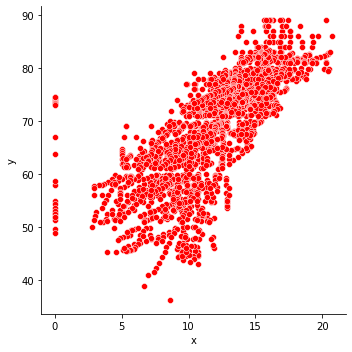

In [11]:
#Q5

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Define independent variable (schooling) and dependent variable (life expectancy)
X = data_cleaned['Schooling']
y = data_cleaned['Life expectancy']

# Add constant to independent variable for regression intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()
# Print regression summary
#print(model.summary())

plt.figure()
sns.relplot(x='Schooling', y='Life expectancy', color = 'r', marker = 'o',kind='scatter',data=data_cleaned)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
## put a linear regression model then check performance


Correlation coefficient between Life Expectancy and Alcohol Consumption: 0.40487676112660204


<Figure size 432x288 with 0 Axes>

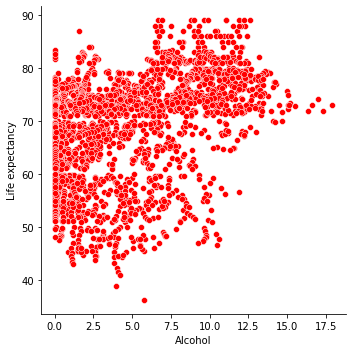

In [68]:
#Q6
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Alcohol']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate correlation coefficient
correlation_coefficient = data_cleaned['Life expectancy'].corr(data_cleaned['Alcohol'])

# Print correlation coefficient
print("Correlation coefficient between Life Expectancy and Alcohol Consumption:", correlation_coefficient)
plt.figure()
sns.relplot(x='Alcohol', y='Life expectancy', color = 'r', marker = 'o',kind='scatter',data=data_cleaned)
plt.show()

Correlation coefficient between Life Expectancy and Population Density: 0.0789296163426082


<Figure size 432x288 with 0 Axes>

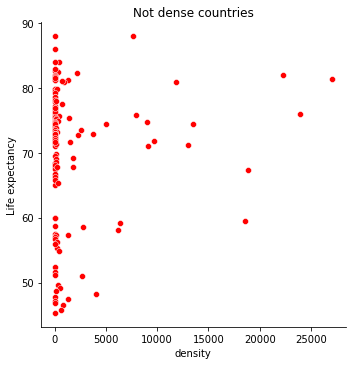

<Figure size 432x288 with 0 Axes>

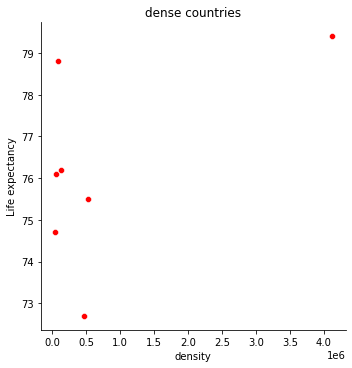

In [67]:
#Q7
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')
countries = pd.read_csv('countries of the world.csv')
# Select relevant columns
selected_columns = ['Life expectancy', 'Population',]

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()
# Calculate population density (population / area)
data_cleaned['density'] = data_cleaned['Population'] / countries['Area (sq. mi.)']
# Calculate correlation coefficient
correlation_coefficient = data_cleaned['Life expectancy'].corr(data_cleaned['density'])

dense_countries = data_cleaned[data_cleaned['density'] >= data_cleaned['density'].mean()]
not_dense_countries = data_cleaned[data_cleaned['density'] < data_cleaned['density'].mean()]

# Print correlation coefficient
print("Correlation coefficient between Life Expectancy and Population Density:", correlation_coefficient)
plt.figure()
sns.relplot(x='density', y='Life expectancy', color = 'r', marker = 'o',kind='scatter',data=not_dense_countries)
plt.title('Not dense countries')
plt.show()

plt.figure()
sns.relplot(x='density', y='Life expectancy', color = 'r', marker = 'o',kind='scatter',data=dense_countries)
plt.title('dense countries')
plt.show()

In [6]:
#Q8
data = pd.read_csv('Life Expectancy Data.csv')
data=data.dropna()
Immunization_Factors = ['Polio','Diphtheria','Hepatitis B']
Immunization_data = data[Immunization_Factors]
model = LinearRegression()

y = data['Life expectancy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Immunization_data, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get coefficients of the features
coefficients = pd.DataFrame(model.coef_, index=Immunization_data.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print coefficients of the features
print("Coefficients of predicting variables affecting life expectancy:")
print(coefficients)

Mean Squared Error: 62.031588516576385
Coefficients of predicting variables affecting life expectancy:
             Coefficient
Diphtheria      0.105742
Polio           0.070782
Hepatitis B    -0.007940


In [ ]:
#Evaluation of the model